# <span style='color:green'>Bank Customer Churn Data Analysis and Prediction

In [674]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pandas_profiling import ProfileReport

%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')

In [675]:
df = pd.read_csv('Bank Customer Historic Data.csv')

# <span style='color:blue'> Analysing Data

In [676]:
df.head().style.background_gradient(cmap='cool')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1
3,4,15701354,Boni,699,France,Female,39,1,0.000000,2,0,0,93826.630000,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.100000,0


In [677]:
df.shape

(10000, 14)

In [678]:
df.drop(columns=['RowNumber','CustomerId'],inplace=True)

In [679]:
df['Surname'].nunique()

2932

#### more no of unique categorical data gives less knowledge, so we will remove it

In [680]:
df.head().style.background_gradient(cmap='cool')

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1
3,Boni,699,France,Female,39,1,0.000000,2,0,0,93826.630000,0
4,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.100000,0


<AxesSubplot:title={'center':'Churned Customers'}>

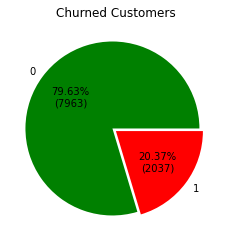

In [681]:
df['Exited'].value_counts().plot(kind='pie',explode=[0.05,0],autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p*(df['Exited'].value_counts().sum()))/100),title='Churned Customers',colors=['g','r'],ylabel='')

- So, Every 5 out 1 Customer has been Churned
- Also this is indication of imbalanced data, so model will not perform much better

<AxesSubplot:title={'center':'Male Customer (Exit Rate)'}, ylabel='Exited'>

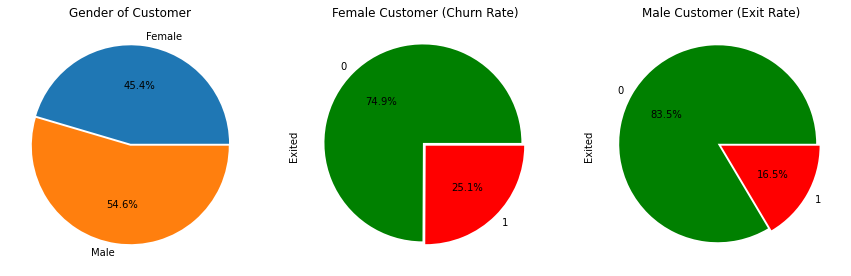

In [682]:
sex=df.groupby(by='Gender')

plt.figure(figsize=(15,5))
plt.subplot(131)
sex.size().plot(kind='pie',autopct='%.1f%%',ylabel='',title='Gender of Customer',explode=[0.02,0])
plt.subplot(132)
sex.get_group('Female')['Exited'].value_counts().plot(kind='pie',colors=['g','r'],explode=[0.04,0],autopct='%.1f%%',title='Female Customer (Churn Rate)')
plt.subplot(133)
sex.get_group('Male')['Exited'].value_counts().plot(kind='pie',colors=['g','r'],explode=[0.04,0],autopct='%.1f%%',title='Male Customer (Exit Rate)')

# <span style='background:gray'>Gender:
- Men are 10% higher then female
- Churn rate is high in female, every 4 out of 1 female churned (need to focus more on female customers)
- Where in male customers every 6 out of 1 male customer churned.


<AxesSubplot:title={'center':'Customer using 4 Product (Churn Rate)'}>

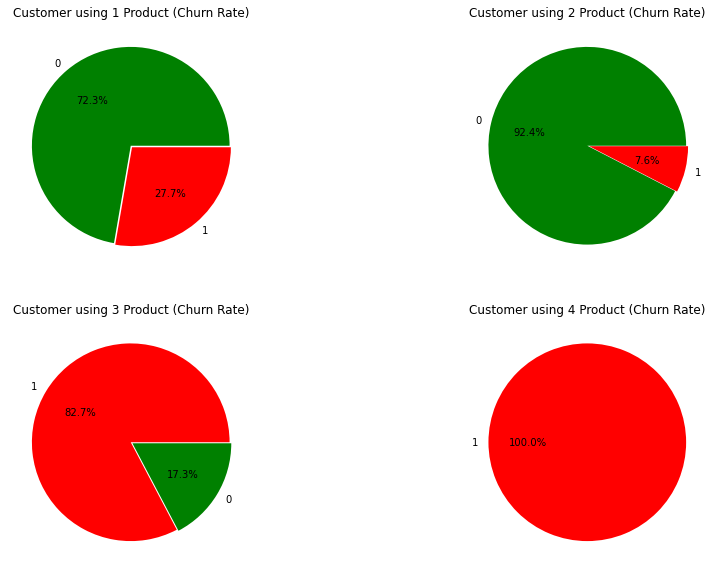

In [683]:
plt.figure(figsize=(15,10))
plt.subplot(221)
df[df['NumOfProducts']==1]['Exited'].value_counts().plot(kind='pie',colors=['g','r'],explode=[0,0.02],autopct='%.1f%%',ylabel='',title='Customer using 1 Product (Churn Rate)')
plt.subplot(222)
df[df['NumOfProducts']==2]['Exited'].value_counts().plot(kind='pie',colors=['g','r'],explode=[0,0.02],autopct='%.1f%%',ylabel='',title='Customer using 2 Product (Churn Rate)')

plt.subplot(223)
df[df['NumOfProducts']==3]['Exited'].value_counts().plot(kind='pie',colors=['r','g'],explode=[0,0.02],autopct='%.1f%%',ylabel='',title='Customer using 3 Product (Churn Rate)')
plt.subplot(224)
df[df['NumOfProducts']==4]['Exited'].value_counts().plot(kind='pie',colors=['r'],autopct='%.1f%%',ylabel='',title='Customer using 4 Product (Churn Rate)')


# <span style='background:gray'>No of Products
- As the no of products increasing churing rate also increasing
1. Those are using 1 product almost 28% churned
2. Those are using 2 products around 7.5% cutomer have been churned
3. Those are using 3 products amlost 83% customer churned,(need to focus on this product or stop giving 3 products to customers)
4. 100% customer churned those were using 4 products, means not a single person intrested in this product. 
- as suggetion bank should stop giving more than 2 products, as very few customers intrested in it
- Bank needs to only focus on two products only not more then two products, to retain the remaing customers

<AxesSubplot:title={'center':'Churned Customer has a Credit Card?'}>

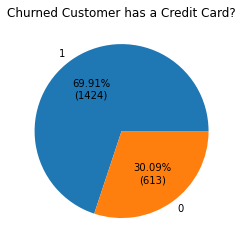

In [684]:
df[df['Exited']==1]['HasCrCard'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p*(df[df['Exited']==1]['HasCrCard'].value_counts().sum())/100)),title='Churned Customer has a Credit Card?',ylabel='',)

# <span style='background:gray'>Has a Credit Card?
- around 70% customers churned those had a credit card, it is clearly indicates cutomers are not happy with credit card service
- 30% customers churned who had no credit card

In [685]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [686]:
fig=px.sunburst(df,path=['Geography','Exited'],title='Geography and Churned Customers',width=500)
fig.show()

Text(0.5, 1.0, 'Region wise Customer')

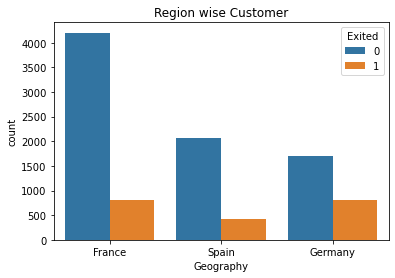

In [687]:
sns.countplot(df['Geography'],hue=df['Exited'])
plt.title('Region wise Customer')

# <span style='background:gray'>Geograpgy
- Around 50% total customers belong to France and rest 25%-25%
- Churn rate also higher in France
- Churn rate low in Spain

In [688]:
fig=px.sunburst(df,path=['Gender','Geography','Exited'],title='Gender, Geography and Churned Customers',width=500)
fig.show()

# <span style='background:gray'>Gender vs Geography
- Churn rate high in Male those are from France and Germany same with Female


Text(0.5, 1.0, 'Top 20 Credit Score of Customers')

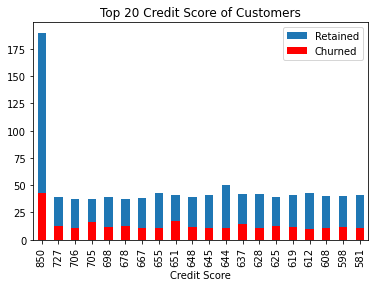

In [689]:
df[df['Exited']==0]['CreditScore'].value_counts().head(20).sort_index(ascending=False).plot(kind='bar',xlabel='Credit Score',label='Retained')
df[df['Exited']==1]['CreditScore'].value_counts().head(20).sort_index(ascending=False).plot(kind='bar',xlabel='Credit Score',color='r',label='Churned')
plt.legend()
plt.title('Top 20 Credit Score of Customers')

# <span style='background:gray'>Credit Score
- Here we can't find any pattern over credit score, 
- churned customer also have good and bad credit score same as retained customers

Text(0.5, 1.0, 'Top 20 Credit Score')

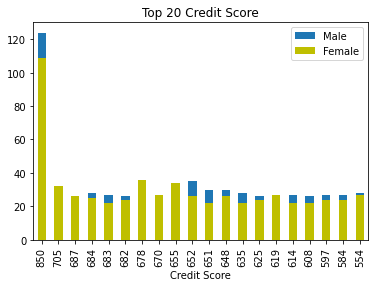

In [690]:
df[df['Gender']=='Male']['CreditScore'].value_counts().head(20).sort_index(ascending=False).plot(kind='bar',label='Male')
df[df['Gender']=='Female']['CreditScore'].value_counts().head(20).sort_index(ascending=False).plot(kind='bar',color='y',label='Female',xlabel='Credit Score')
plt.legend()
plt.title('Top 20 Credit Score')

- Credit score of male and female almost same

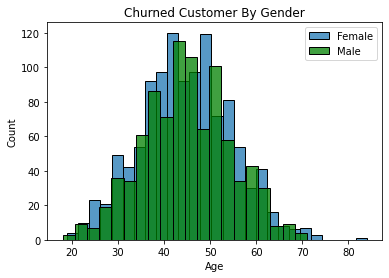

In [691]:
female= df[df['Gender']=='Female']
male= df[df['Gender']=='Male']


sns.histplot(female[female['Exited']==1]['Age'],label='Female')
sns.histplot(male[male['Exited']==1]['Age'],color='g',label='Male')
plt.title('Churned Customer By Gender')
plt.legend()

# <span style='background:gray'>Age
- we could clearly see middle aged people has been left more then lower and higher aged customer.
- Need to focus on those customer's age between 35 to 55 years.

<AxesSubplot:title={'center':'Category of No of Products'}>

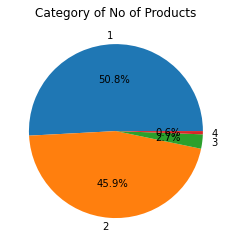

In [692]:
df['NumOfProducts'].value_counts().plot(kind='pie',autopct='%.1f%%',ylabel='',title='Category of No of Products')

Text(0.5, 1.0, 'Category of Products')

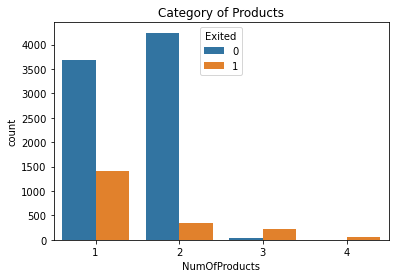

In [693]:
# df[df['Exited']==1]['NumOfProducts'].value_counts().plot(kind='bar',color=['r','g','b','y'])
sns.countplot(df['NumOfProducts'],hue=df['Exited'])
plt.title('Category of Products')

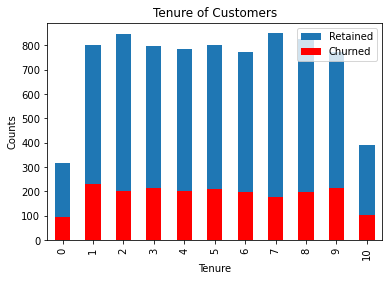

In [694]:
df[df['Exited']==0]['Tenure'].value_counts().sort_index().plot(kind='bar',xlabel='Tenure',label='Retained')
df[df['Exited']==1]['Tenure'].value_counts().sort_index().plot(kind='bar',xlabel='Tenure',color='r',label='Churned')
plt.ylabel('Counts')
plt.title('Tenure of Customers')
plt.legend()

In [695]:
import plotly.express as px
fig = px.imshow(df.corr(), text_auto=True)
fig.show()

- <span style='background:yellow'>Age and Churned have high correlation
- <span style='background:yellow'>Age and Balance also have +ve correlation

In [696]:
px.scatter(df,x='Balance',y='Age',color='NumOfProducts',size='Tenure',title='Balance vs Age')

<AxesSubplot:xlabel='Age', ylabel='Exited'>

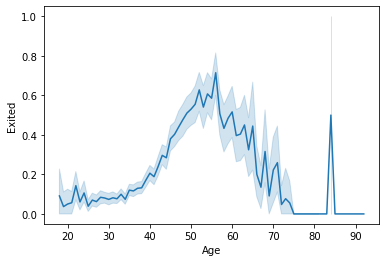

In [697]:
sns.lineplot(df['Age'],df['Exited'])

- <span style='background:yellow'>as the age increasing probability of being churn also increasing at certain limit.

In [698]:
px.scatter(df,x='CreditScore',y='Age',color='Exited',title='Age vs Credit Score')

# <span style='background:red'>Conclusion of above analysis
- <span style='background:gray'>Existing Customers Churn predictions:
    1. Every 4 out of 1 customer will be churned
    2. If a customer is male then from every 6 male customer 1 male customer will be churned
    3. If a customer is female then very 4 out of 1 female customer will be churned.
    3. If a customer using 1 product then 27% chances he/she will be churned
    4. If a customer using 2 product then changes of churn customer is reduced upto 7%.
    5. If a customer is using 3 products then 83% chances he/she will be churned
    6. If a customer using 4 products then 100% he/she will be churned
    7. If a customer's age is between 35 to 55, chances of churn is higher then other age groups



In [699]:
df2 = df.copy()
df2.sample(5)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3067,Buccho,806,Germany,Male,31,10,138653.51,1,1,0,190803.37,0
7092,Nekrasova,758,Spain,Male,40,3,0.00,2,0,0,96097.65,0
7137,Lu,630,Germany,Female,28,8,106425.75,1,1,1,20344.84,0
4834,Ch'en,752,Spain,Female,35,2,0.00,1,1,0,44335.54,1
8585,Weatherford,754,France,Female,45,6,0.00,1,1,0,73881.68,1


In [700]:
df2.drop(columns='Surname',axis=1,inplace=True)

# <span style='color:blue'>Outliers Detection and Removel

In [701]:
px.box(x=df['EstimatedSalary'],height=300)

In [702]:
# outlier detection
def outliers_detect(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr = q3-q1
    lower_value = q1-1.5*iqr
    upper_value = q3+1.5*iqr
    return lower_value,upper_value

# <span style='color:blue'> Using capping outlier technique

In [703]:
num_cols= ['CreditScore','Age', 'Balance','EstimatedSalary'] # there are columns with outliers
for i in num_cols:
    cs_low,cs_high = outliers_detect(df[i])
    df[i]=df[i].apply(lambda x: cs_low if x<cs_low else(cs_high if x>cs_high else x)).astype(int)

In [704]:
# applying one hot encoding using pandas
df2[['Germany','Spain']]=pd.get_dummies(df2['Geography'],drop_first=True)

In [705]:
# tranforming gender data to numerical
df2['Gender']=df2['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [706]:
df2.drop(columns='Geography',inplace=True)

In [707]:
# Train test data
X= df2.drop(columns='Exited')
y = df2['Exited']

# <span style='color:blue'>Feature Scaling

In [708]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
stand = StandardScaler()
minmax = MinMaxScaler()

In [709]:
X_stand=stand.fit_transform(X)
X_stand = pd.DataFrame(X_stand,columns=X.columns)

In [710]:
X_norm = minmax.fit_transform(X)
X_norm=pd.DataFrame(X_norm,columns=X.columns)

# <span style='color:blue'>Train Test Split

In [711]:
from sklearn.model_selection import train_test_split

In [712]:
X_train_stand,X_test_stand,y_train,y_test = train_test_split(X_stand,y,test_size=0.2,random_state=0)

In [713]:
X_train_norm,X_test_norm,y_train,y_test = train_test_split(X_norm,y,test_size=0.2,random_state=0)

# <span style='color:blue'>Model Selection

In [714]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [715]:
def model_result(x_train,x_test):
    lor_clf = LogisticRegression()
    dt_clf = DecisionTreeClassifier()
    rf_clf = RandomForestClassifier(n_estimators=120)
    knn_clf = KNeighborsClassifier(n_neighbors=25)
    gb_clf = GradientBoostingClassifier()
    naive_clf = GaussianNB()
    sgd_clf = SGDClassifier()
    svc = SVC()


    model = [lor_clf,dt_clf,rf_clf,knn_clf,gb_clf,naive_clf,sgd_clf,svc]
    
    dic = {}
    for i in model:
        i.fit(x_train,y_train)
        y_pred =i.predict(x_test)
#         print(i,"\n Accuracy % :",'{:.2f}%'.format(accuracy_score(y_test,y_pred)*100))
#         print("Confusion Metric: \n",confusion_matrix(y_test,y_pred),'\n')

        dic[i] = '{:.2f}%'.format(accuracy_score(y_test,y_pred)*100)
    m = max(dic.values())
    
    def get_key(val):
        for key, value in dic.items():
             if val == value:
                 return key,val
    print("******** Highest Accuracy Score*******")
    print(get_key(m))
    
    

# <span style='color:blue'>Model Prediction

### Result on without scaled data

In [716]:
model_result(X_train,X_test)

******** Highest Accuracy Score*******
(GradientBoostingClassifier(), '86.75%')


### Result on standerdized data

In [717]:
model_result(X_train_stand,X_test_stand)

******** Highest Accuracy Score*******
(GradientBoostingClassifier(), '86.75%')


### Result on Normalized data

In [718]:
model_result(X_train_norm,X_test_norm)

******** Highest Accuracy Score*******
(GradientBoostingClassifier(), '86.75%')
